# Visualization Project  :- 

## Music Album Popularity Prediction 

In [1]:
# Importing the required libraries : - 
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import math
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Merging the dataset

In [3]:
# Loading train and test data
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# Adding a column to identify whether the row is from the training or test set
train_data['is_train'] = 1
test_data['is_train'] = 0

# Concatenating the data
merged_data = pd.concat([train_data, test_data], ignore_index=True)

# Saving the merged data to a new CSV file
merged_data.to_csv('new_data.csv', index=False)


## Loading the Dataset

In [4]:
df = pd.read_csv('C:\\Users\\salman_mohamm3d\\Desktop\\Visualization of AI ML\\project\\music album popularity prediction dataset\\archive (2)\\new_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181207 entries, 0 to 181206
Data columns (total 46 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            181207 non-null  int64  
 1   name          181206 non-null  object 
 2   release_date  181207 non-null  object 
 3   artists       181207 non-null  object 
 4   total_tracks  181207 non-null  int64  
 5   t_name0       181206 non-null  object 
 6   t_name1       127203 non-null  object 
 7   t_name2       122884 non-null  object 
 8   t_dur0        181207 non-null  int64  
 9   t_dur1        127203 non-null  float64
 10  t_dur2        122884 non-null  float64
 11  t_dance0      180957 non-null  float64
 12  t_dance1      127064 non-null  float64
 13  t_dance2      122801 non-null  float64
 14  t_energy0     180957 non-null  float64
 15  t_energy1     127064 non-null  float64
 16  t_energy2     122801 non-null  float64
 17  t_key0        180957 non-null  float64
 18  t_ke

In [5]:
df.head(100)

id                                               name release_date  \
0    0                                 Ya Solo Eres Mi Ex   2021-09-09   
1    1                                             Nibiru   2019-11-29   
2    2                                              DAMN.   2017-04-14   
3    3                      Did I Shave My Legs For This?   1996-01-01   
4    4                                            glisten   2018-05-04   
..  ..                                                ...          ...   
95  95                      Get You The Moon (feat. Snøw)   2018-10-08   
96  96  How To Train Your Dragon (Music From The Motio...   2010-01-01   
97  97                                           Cheesin'   2020-04-22   
98  98                                            Daisies   2020-05-15   
99  99            Razorblade Romance (Deluxe Re-Mastered)   2014-12-15   

                                      artists  total_tracks  \
0    La Adictiva Banda San José de Mesillas,              7   
1                                     Ozuna,             18   
2                            Kendrick Lamar,             14   
3                              Deana Carter,             11   
4                             Jeremy Zucker,              4   
..                                        ...           ...   
95                                     Kina,              1   
96                              John Powell,             25   
97  Cautious Clay, Remi Wolf, sophie meiers,              1   
98                               Katy Perry,              1   
99                                      HIM,             19   

                                              t_name0                 t_name1  \
0                                  Ya Solo Eres Mi Ex            La Malagueña   
1                                              Nibiru  Hasta Que Salga el Sol   
2                                              BLOOD.                    DNA.   
3                           I've Loved Enough To Know        We Danced Anyway   
4                          all the kids are depressed                wildfire   
..                                                ...                     ...   
95                      Get You The Moon (feat. Snøw)                     NaN   
96                                       This Is Berk           Dragon Battle   
97  Cheesin’ (with Cautious Clay, Remi Wolf, Still...                     NaN   
98                                            Daisies                     NaN   
99                    I Love You (Prelude To Tragedy)             Poison Girl   

                   t_name2  t_dur0    t_dur1  ...  t_val1  t_val2  t_tempo0  \
0   México Lindo y Querido  222133  189133.0  ...   0.878  0.8330    74.924   
1                 Temporal  158826  188480.0  ...   0.598  0.4840   173.023   
2                     YAH.  118066  185946.0  ...   0.422  0.6480   156.907   
3              Count Me In  203693  202533.0  ...   0.651  0.2630   120.285   
4      glisten (interlude)  169973  163000.0  ...   0.426  0.4660   103.861   
..                     ...     ...       ...  ...     ...     ...       ...   
95                     NaN  179080       NaN  ...     NaN     NaN   118.917   
96       The Downed Dragon  250266  115013.0  ...   0.321  0.0602   123.267   
97                     NaN  138000       NaN  ...     NaN     NaN   120.104   
98                     NaN  173123       NaN  ...     NaN     NaN   122.179   
99        Join Me In Death  189205  231103.0  ...   0.520  0.5150   163.607   

    t_tempo1  t_tempo2  t_sig0  t_sig1  t_sig2  popularity  is_train  
0    126.970   197.836     4.0     3.0     3.0        51.0         1  
1     96.042   148.019     4.0     4.0     4.0        67.0         1  
2    139.913    69.986     4.0     4.0     4.0        81.0         1  
3     94.054   130.011     4.0     4.0     4.0        53.0         1  
4    129.170   116.349     4.0     4.0     4.0        70.0         1  
..       .

In [6]:
df.shape

(181207, 46)

In [7]:
df.describe()

id   total_tracks        t_dur0        t_dur1        t_dur2  \
count  181207.000000  181207.000000  1.812070e+05  1.272030e+05  1.228840e+05   
mean    90603.000000      11.021175  1.990648e+05  2.134121e+05  2.142064e+05   
std     52310.099452      23.121934  1.152684e+05  1.095481e+05  9.786787e+04   
min         0.000000       1.000000  1.485000e+03  4.120000e+03  2.113000e+03   
25%     45301.500000       1.000000  1.507690e+05  1.688800e+05  1.693190e+05   
50%     90603.000000      10.000000  1.920620e+05  2.037300e+05  2.064130e+05   
75%    135904.500000      14.000000  2.336000e+05  2.427920e+05  2.448750e+05   
max    181206.000000    1190.000000  1.082819e+07  7.054236e+06  6.145123e+06   

            t_dance0       t_dance1       t_dance2      t_energy0  \
count  180957.000000  127064.000000  122801.000000  180957.000000   
mean        0.606277       0.608402       0.609340       0.605146   
std         0.184047       0.177483       0.179398       0.236689   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.490000       0.498750       0.500000       0.458000   
50%         0.630000       0.631000       0.627000       0.633000   
75%         0.745000       0.736000       0.742000       0.793000   
max         0.988000       0.992000       0.985000       1.000000   

           t_energy1  ...         t_val1         t_val2       t_tempo0  \
count  127064.000000  ...  127064.000000  122801.000000  180957.000000   
mean        0.628930  ...       0.492792       0.484944     119.739825   
std         0.232757  ...       0.250204       0.253048      31.201646   
min         0.000000  ...       0.000000       0.000000       0.000000   
25%         0.489000  ...       0.298000       0.289000      95.514000   
50%         0.660000  ...       0.498000       0.482000     119.987000   
75%         0.811000  ...       0.689000       0.682000     140.016000   
max         1.000000  ...       1.000000       1.000000     239.713000   

            t_tempo1       t_tempo2         t_sig0         t_sig1  \
count  127064.000000  122801.000000  180957.000000  127064.000000   
mean      121.092684     120.653097       3.896323       3.910148   
std        30.476803      30.920109       0.510765       0.434635   
min         0.000000       0.000000       0.000000       0.000000   
25%        96.624000      96.005000       4.000000       4.000000   
50%       120.019000     119.988000       4.000000       4.000000   
75%       141.138000     141.026000       4.000000       4.000000   
max       248.500000     246.322000       5.000000       5.000000   

              t_sig2     popularity       is_train  
count  122801.000000  160000.000000  181207.000000  
mean        3.902436      47.034306       0.882968  
std         0.464349      22.511931       0.321459  
min         0.000000       1.000000       0.000000  
25%         4.000000      29.000000       1.000000  
50%         4.000000      50.000000       1.000000  
75%         4.000000      66.000000       1.000000  
max         5.000000     100.000000       1.000000  

[8 rows x 40 columns]

In [8]:
print(df.keys())

Index(['id', 'name', 'release_date', 'artists', 'total_tracks', 't_name0',
       't_name1', 't_name2', 't_dur0', 't_dur1', 't_dur2', 't_dance0',
       't_dance1', 't_dance2', 't_energy0', 't_energy1', 't_energy2', 't_key0',
       't_key1', 't_key2', 't_mode0', 't_mode1', 't_mode2', 't_speech0',
       't_speech1', 't_speech2', 't_acous0', 't_acous1', 't_acous2', 't_ins0',
       't_ins1', 't_ins2', 't_live0', 't_live1', 't_live2', 't_val0', 't_val1',
       't_val2', 't_tempo0', 't_tempo1', 't_tempo2', 't_sig0', 't_sig1',
       't_sig2', 'popularity', 'is_train'],
      dtype='object')


In [9]:
pd.isnull(df).sum() #count of missing values

id                  0
name                1
release_date        0
artists             0
total_tracks        0
t_name0             1
t_name1         54004
t_name2         58323
t_dur0              0
t_dur1          54004
t_dur2          58323
t_dance0          250
t_dance1        54143
t_dance2        58406
t_energy0         250
t_energy1       54143
t_energy2       58406
t_key0            250
t_key1          54143
t_key2          58406
t_mode0           250
t_mode1         54143
t_mode2         58406
t_speech0         250
t_speech1       54143
t_speech2       58406
t_acous0          250
t_acous1        54143
t_acous2        58406
t_ins0            250
t_ins1          54143
t_ins2          58406
t_live0           250
t_live1         54143
t_live2         58406
t_val0            250
t_val1          54143
t_val2          58406
t_tempo0          250
t_tempo1        54143
t_tempo2        58406
t_sig0            250
t_sig1          54143
t_sig2          58406
popularity      21207
is_train  

In [10]:
# Using the copy() method to create a new DataFrame
df_copy = df.copy()

In [11]:
df_copy.head(10)

id                           name release_date  \
0   0             Ya Solo Eres Mi Ex   2021-09-09   
1   1                         Nibiru   2019-11-29   
2   2                          DAMN.   2017-04-14   
3   3  Did I Shave My Legs For This?   1996-01-01   
4   4                        glisten   2018-05-04   
5   5    IDK You Yet (Live on Piano)   2020-06-23   
6   6                     Pocahontas   1995-01-01   
7   7                     Next Level   2020-12-03   
8   8                    Green River   1969-08-03   
9   9                Wu-Tang Forever   1997-06-03   

                                    artists  total_tracks  \
0  La Adictiva Banda San José de Mesillas,              7   
1                                   Ozuna,             18   
2                          Kendrick Lamar,             14   
3                            Deana Carter,             11   
4                           Jeremy Zucker,              4   
5                            Alexander 23,              2   
6                         Various Artists,             28   
7                               ODP_Scino,              9   
8            Creedence Clearwater Revival,             14   
9                            Wu-Tang Clan,             27   

                                             t_name0  \
0                                 Ya Solo Eres Mi Ex   
1                                             Nibiru   
2                                             BLOOD.   
3                          I've Loved Enough To Know   
4                         all the kids are depressed   
5                        IDK You Yet - Live on Piano   
6  The Virginia Company - From "Pocahontas"/Sound...   
7                                           Hennessy   
8                                        Green River   
9        Wu-Revolution (feat. Poppa Wu & Uncle Pete)   

                                 t_name1  \
0                           La Malagueña   
1                 Hasta Que Salga el Sol   
2                                   DNA.   
3                       We Danced Anyway   
4                               wildfire   
5                            IDK You Yet   
6  Ship At Sea - From "Pocahontas"/Score   
7                                   Work   
8                              Commotion   
9                               Reunited   

                                             t_name2  t_dur0    t_dur1  ...  \
0                             México Lindo y Querido  222133  189133.0  ...   
1                                           Temporal  158826  188480.0  ...   
2                                               YAH.  118066  185946.0  ...   
3                                        Count Me In  203693  202533.0  ...   
4                                glisten (interlude)  169973  163000.0  ...   
5                                                NaN  234538  184638.0  ...   
6  The Virginia Company (Reprise) - From "Pocahon...   90160  154760.0  ...   
7                                              Smash  153600  131072.0  ...   
8                                   Tombstone Shadow  154120  164293.0  ...   
9                For Heavens Sake (feat. Cappadonna)  406426  321733.0  ...   

   t_val1  t_val2  t_tempo0  t_tempo1  t_tempo2  t_sig0  t_sig1  t_sig2  \
0  0.8780   0.833    74.924   126.970   197.836     4.0     3.0     3.0   
1  0.5980   0.484   173.023    96.042   148.019     4.0     4.0     4.0   
2  0.4220   0.648   156.907   139.913    69.986     4.0     4.0     4.0   
3  0.6510   0.263   120.285    94.054   130.011     4.0     4.0     4.0   
4  0.4260   0.466   103.861   129.170   116.349     4.0     4.0     4.0   
5  0.1980     NaN    64.142    76.997       NaN     4.0     1.0     NaN   
6  0.0847   0.620   177.987    89.908    90.680     4.0     4.0     3.0   
7  0.2070   0.212    85.071    86.445    81.915     4.0     4.0     4.0   
8  0.7960   0.968   141.694   127.472   110.165     4.0     4.0     4.0   
9  0.8320   0.649   159.9

In [12]:
# Dropping the columns which has more than 50000  missing values in it
threshold = 50000
df_cleaned = df_copy.dropna(axis=1, thresh=df.shape[0] - threshold)

In [13]:
# Display the cleaned DataFrame
df_cleaned.shape

(181207, 20)

In [14]:
df_cleaned.head(30)

id                                               name release_date  \
0    0                                 Ya Solo Eres Mi Ex   2021-09-09   
1    1                                             Nibiru   2019-11-29   
2    2                                              DAMN.   2017-04-14   
3    3                      Did I Shave My Legs For This?   1996-01-01   
4    4                                            glisten   2018-05-04   
5    5                        IDK You Yet (Live on Piano)   2020-06-23   
6    6                                         Pocahontas   1995-01-01   
7    7                                         Next Level   2020-12-03   
8    8                                        Green River   1969-08-03   
9    9                                    Wu-Tang Forever   1997-06-03   
10  10                        Salsoul Nugget (If U Wanna)   2020-11-20   
11  11  Enjoy Enjaami - Spotify Singles (with Dhee fea...   2021-06-21   
12  12                               Dark Lane Demo Tapes   2020-05-01   
13  13                                           epiphany   2021-06-02   
14  14                                      High Off Life   2020-05-15   
15  15                     Club Future Nostalgia (DJ Mix)   2020-08-28   
16  16                                                QVC   2021-04-23   
17  17                                             Quoted   2021-03-23   
18  18                                           I AM YOU   2018-08-03   
19  19                        Dangerous: The Double Album   2021-01-08   
20  20                                         ? (Deluxe)   2019-09-06   
21  21                 Come Over When You're Sober, Pt. 2   2018-11-09   
22  22                                      Box Fan Sound   2013-10-08   
23  23                                          Metallica   1991-08-12   
24  24                                              Lolly   2013-01-01   
25  25                                          Beethoven   2021-08-29   
26  26                                     Saint Cloud +3   2021-03-29   
27  27               Tequila On A Boat (feat. Chris Lane)   2021-05-14   
28  28                                               ZAZA   2021-02-19   
29  29                                        Golden Hour   2020-05-29   

                                     artists  total_tracks  \
0   La Adictiva Banda San José de Mesillas,              7   
1                                    Ozuna,             18   
2                           Kendrick Lamar,             14   
3                             Deana Carter,             11   
4                            Jeremy Zucker,              4   
5                             Alexander 23,              2   
6                          Various Artists,             28   
7                                ODP_Scino,              9   
8             Creedence Clearwater Revival,             14   
9                             Wu-Tang Clan,             27   
10                 M&S, The Girl Next Door,              5   
11                          DJ Snake, Dhee,              1   
12                                   Drake,             14   
13                                KA$HDAMI,             14   
14                                  Future,             21   
15           Dua Lipa, The Blessed Madonna,             17   
16                                  Skofee,              1   
17                   Gerald Kenneth Turner,              2   
18                               YNW Melly,             15   
19                           Morgan Wallen,             30   
20                            XXXTENTACION,             53   
21                                Lil Peep,             13   
22       Tmsoft’s White Noise Sleep Sounds,              1   
23                               Metallica,             12   
24                                  Maejor,              1   
25                                 Kenndog,              1   
26                             Waxa

In [15]:
# Renaming the column names for better understanding
df_cleaned.rename(columns={'name': 'song_name', 't_name0': 'name','t_dur0': 'duration','t_dance0': 'dancebility','t_energy0': 'energy','t_key0': 'key','t_mode0': 'mode','t_speech0': 'speech','t_acous0': 'acoustibility','t_ins0': 'instrumentalness', 't_live0': 'liveness','t_val0': 'valence','t_tempo0': 'tempo','t_sig0': 'time_signature'}, inplace=True)

# Display the DataFrame with updated column names
df_cleaned.head(20)


id                                          song_name release_date  \
0    0                                 Ya Solo Eres Mi Ex   2021-09-09   
1    1                                             Nibiru   2019-11-29   
2    2                                              DAMN.   2017-04-14   
3    3                      Did I Shave My Legs For This?   1996-01-01   
4    4                                            glisten   2018-05-04   
5    5                        IDK You Yet (Live on Piano)   2020-06-23   
6    6                                         Pocahontas   1995-01-01   
7    7                                         Next Level   2020-12-03   
8    8                                        Green River   1969-08-03   
9    9                                    Wu-Tang Forever   1997-06-03   
10  10                        Salsoul Nugget (If U Wanna)   2020-11-20   
11  11  Enjoy Enjaami - Spotify Singles (with Dhee fea...   2021-06-21   
12  12                               Dark Lane Demo Tapes   2020-05-01   
13  13                                           epiphany   2021-06-02   
14  14                                      High Off Life   2020-05-15   
15  15                     Club Future Nostalgia (DJ Mix)   2020-08-28   
16  16                                                QVC   2021-04-23   
17  17                                             Quoted   2021-03-23   
18  18                                           I AM YOU   2018-08-03   
19  19                        Dangerous: The Double Album   2021-01-08   

                                     artists  total_tracks  \
0   La Adictiva Banda San José de Mesillas,              7   
1                                    Ozuna,             18   
2                           Kendrick Lamar,             14   
3                             Deana Carter,             11   
4                            Jeremy Zucker,              4   
5                             Alexander 23,              2   
6                          Various Artists,             28   
7                                ODP_Scino,              9   
8             Creedence Clearwater Revival,             14   
9                             Wu-Tang Clan,             27   
10                 M&S, The Girl Next Door,              5   
11                          DJ Snake, Dhee,              1   
12                                   Drake,             14   
13                                KA$HDAMI,             14   
14                                  Future,             21   
15           Dua Lipa, The Blessed Madonna,             17   
16                                  Skofee,              1   
17                   Gerald Kenneth Turner,              2   
18                               YNW Melly,             15   
19                           Morgan Wallen,             30   

                                                 name  duration  dancebility  \
0                                  Ya Solo Eres Mi Ex    222133        0.455   
1                                              Nibiru    158826        0.814   
2                                              BLOOD.    118066        0.357   
3                           I've Loved Enough To Know    203693        0.640   
4                          all the kids are depressed    169973        0.773   
5                         IDK You Yet - Live on Piano    234538        0.371   
6   The Virginia Company - From "Pocahontas"/Sound...     90160        0.577   
7                                            Hennessy    153600        0.705   
8                                         Green River    154120        0.702   
9         Wu-Revolution (feat. Poppa Wu & Uncle Pete)    406426        0.674   
10    Salsoul Nugget (If U Wanna) [M&S Radio Version]    209813        0.718   
11  Enjoy Enjaami - Spotify Singles (with Dhee fea...    167058        0.815   
12                                       Deep Pockets    222928        0.473   
13                        

In [16]:
# dropping a column
column_to_drop = ['is_train','name']
df_cleaned = df_cleaned.drop(column_to_drop, axis=1)


In [17]:
df_cleaned.head(30)

id                                          song_name release_date  \
0    0                                 Ya Solo Eres Mi Ex   2021-09-09   
1    1                                             Nibiru   2019-11-29   
2    2                                              DAMN.   2017-04-14   
3    3                      Did I Shave My Legs For This?   1996-01-01   
4    4                                            glisten   2018-05-04   
5    5                        IDK You Yet (Live on Piano)   2020-06-23   
6    6                                         Pocahontas   1995-01-01   
7    7                                         Next Level   2020-12-03   
8    8                                        Green River   1969-08-03   
9    9                                    Wu-Tang Forever   1997-06-03   
10  10                        Salsoul Nugget (If U Wanna)   2020-11-20   
11  11  Enjoy Enjaami - Spotify Singles (with Dhee fea...   2021-06-21   
12  12                               Dark Lane Demo Tapes   2020-05-01   
13  13                                           epiphany   2021-06-02   
14  14                                      High Off Life   2020-05-15   
15  15                     Club Future Nostalgia (DJ Mix)   2020-08-28   
16  16                                                QVC   2021-04-23   
17  17                                             Quoted   2021-03-23   
18  18                                           I AM YOU   2018-08-03   
19  19                        Dangerous: The Double Album   2021-01-08   
20  20                                         ? (Deluxe)   2019-09-06   
21  21                 Come Over When You're Sober, Pt. 2   2018-11-09   
22  22                                      Box Fan Sound   2013-10-08   
23  23                                          Metallica   1991-08-12   
24  24                                              Lolly   2013-01-01   
25  25                                          Beethoven   2021-08-29   
26  26                                     Saint Cloud +3   2021-03-29   
27  27               Tequila On A Boat (feat. Chris Lane)   2021-05-14   
28  28                                               ZAZA   2021-02-19   
29  29                                        Golden Hour   2020-05-29   

                                     artists  total_tracks  duration  \
0   La Adictiva Banda San José de Mesillas,              7    222133   
1                                    Ozuna,             18    158826   
2                           Kendrick Lamar,             14    118066   
3                             Deana Carter,             11    203693   
4                            Jeremy Zucker,              4    169973   
5                             Alexander 23,              2    234538   
6                          Various Artists,             28     90160   
7                                ODP_Scino,              9    153600   
8             Creedence Clearwater Revival,             14    154120   
9                             Wu-Tang Clan,             27    406426   
10                 M&S, The Girl Next Door,              5    209813   
11                          DJ Snake, Dhee,              1    167058   
12                                   Drake,             14    222928   
13                                KA$HDAMI,             14    118256   
14                                  Future,             21    201979   
15           Dua Lipa, The Blessed Madonna,             17    174240   
16                                  Skofee,              1    165867   
17                   Gerald Kenneth Turner,              2    208000   
18                               YNW Melly,             15    193733   
19                           Morgan Wallen,             30    202133   
20                            XXXTENTACION,             53    117482   
21                                Lil Peep,             13    280520   
22       Tmsoft’s White Noise Sleep Sounds,          

In [18]:
pd.isnull(df_cleaned).sum() #count of missing values

id                      0
song_name               1
release_date            0
artists                 0
total_tracks            0
duration                0
dancebility           250
energy                250
key                   250
mode                  250
speech                250
acoustibility         250
instrumentalness      250
liveness              250
valence               250
tempo                 250
time_signature        250
popularity          21207
dtype: int64

In [19]:
df_cleaned.shape

(181207, 18)

In [20]:
# As we've very less number of missing values we can drop those rows which has NAN or null values in it
df_cleaned = df_cleaned.dropna()
pd.isnull(df_cleaned).sum()

id                  0
song_name           0
release_date        0
artists             0
total_tracks        0
duration            0
dancebility         0
energy              0
key                 0
mode                0
speech              0
acoustibility       0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
popularity          0
dtype: int64

In [21]:
#Removing Duplicate rows (if any)
counter = 0
rs,cs = df_cleaned.shape

df_cleaned.drop_duplicates(inplace=True)

if df_cleaned.shape==(rs,cs):
    print('\n\033[1mInference:\033[0m The dataset doesn\'t have any duplicates')
else:
    print(f'\n\033[1mInference:\033[0m Number of duplicates dropped/fixed ---> {rs-df_cleaned.shape[0]}')


Inference: The dataset doesn't have any duplicates


In [22]:
# Amount of data left after dropping the missing values
df_cleaned.shape

(159786, 18)

In [23]:
df_cleaned.describe()

id   total_tracks      duration    dancebility  \
count  159786.000000  159786.000000  1.597860e+05  159786.000000   
mean    79997.374670      11.000282  1.991341e+05       0.606401   
std     46188.952029      23.018902  1.104235e+05       0.184056   
min         0.000000       1.000000  1.485000e+03       0.000000   
25%     39992.250000       1.000000  1.508880e+05       0.490000   
50%     79995.500000      10.000000  1.920660e+05       0.630000   
75%    120000.750000      14.000000  2.336130e+05       0.745000   
max    159999.000000    1190.000000  4.718250e+06       0.988000   

              energy            key           mode         speech  \
count  159786.000000  159786.000000  159786.000000  159786.000000   
mean        0.605095       5.216483       0.607406       0.133863   
std         0.236601       3.585813       0.488329       0.147290   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.458000       2.000000       0.000000       0.040900   
50%         0.633000       5.000000       1.000000       0.066200   
75%         0.792000       8.000000       1.000000       0.174000   
max         1.000000      11.000000       1.000000       0.968000   

       acoustibility  instrumentalness       liveness        valence  \
count  159786.000000     159786.000000  159786.000000  159786.000000   
mean        0.297695          0.144891       0.200705       0.468572   
std         0.313269          0.304190       0.167700       0.255854   
min         0.000000          0.000000       0.000000       0.000000   
25%         0.031000          0.000000       0.097600       0.261000   
50%         0.166000          0.000014       0.128000       0.460000   
75%         0.505000          0.019700       0.260000       0.670000   
max         0.996000          1.000000       0.995000       1.000000   

               tempo  time_signature     popularity  
count  159786.000000   159786.000000  159786.000000  
mean      119.736980        3.896737      47.026392  
std        31.188965        0.510577      22.513830  
min         0.000000        0.000000       1.000000  
25%        95.514000        4.000000      29.000000  
50%       119.987000        4.000000      50.000000  
75%       140.015000        4.000000      66.000000  
max       239.713000        5.000000     100.000000

In [24]:
df_cleaned.nunique().sort_values()

mode                     2
time_signature           5
key                     12
popularity              96
total_tracks           205
dancebility           1141
speech                1620
liveness              1686
valence               1755
energy                2090
acoustibility         4373
instrumentalness      5257
release_date          7573
tempo                38476
artists              46323
duration             49085
song_name            66362
id                  159786
dtype: int64

In [25]:
#finding out the numerical and the categorical columns in dataset
features = [i for i in df_cleaned.columns]
nu = df_cleaned[features].nunique().sort_values()
nf = []; cf = []; nnf = 0; ncf = 0; #numerical & categorical features

for i in range(df_cleaned[features].shape[1]):
    if nu.values[i]<=16:cf.append(nu.index[i])
    else: nf.append(nu.index[i])

print('\n\033[1mInference:\033[0m The Dataset has {} numerical & {} categorical features.'.format(len(nf),len(cf)))


Inference: The Dataset has 15 numerical & 3 categorical features.


## Performing Exploratory Data Analysis

### Univeriate Analysis - Numeric Column

Text(0.5, 1.0, 'Popularity Distribution')

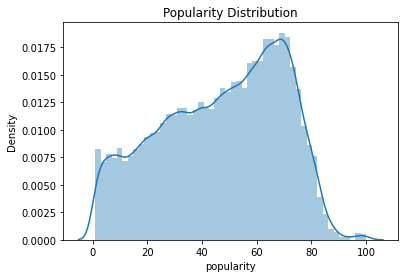

In [26]:
sns.distplot(df_cleaned['popularity']).set_title('Popularity Distribution')

## Univeriate Analysis - Categorical Columns

                               Visualising Categorical Features:                                


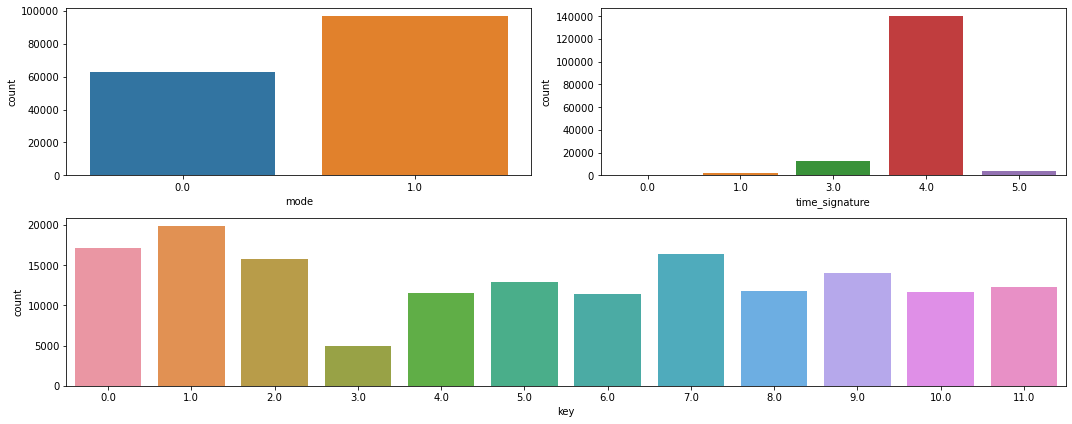

In [27]:
#Visualising the categorical features 

print('\033[1mVisualising Categorical Features:'.center(100))

n=2
plt.figure(figsize=[15,3*math.ceil(len(cf)/n)])

for i in range(len(cf)):
    if df_cleaned[cf[i]].nunique()<=8:
        plt.subplot(math.ceil(len(cf)/n),n,i+1)
        sns.countplot(df_cleaned[cf[i]])
    else:
        plt.subplot(2,1,2)
        sns.countplot(df_cleaned[cf[i]])
        
plt.tight_layout()
plt.show()

#### Observation

1)There is a general decrease in the frequency of categorical values as the feature increases.

2)Some categorical values seem to be outliers. For example, the tracks with the mode value of 1.0 have significantly more songs than any other tracks.

3)The key of 1.0 or 0.0 has a large number of tracks, indicating a high occurrence of these keys in the dataset.

4)The time signature of 1.0 has the most number of tracks, which means it is the most common time signature in the dataset.



## Univeriate Analysis - Numeric Columns

In [28]:
import pandas as pd

# Assuming 'column_name' is the name of the column you want to convert
df_cleaned['release_date'] = pd.to_datetime(df_cleaned['release_date'], errors='coerce', format='%Y-%m-%d')


                                 Numeric Features Distribution                                  


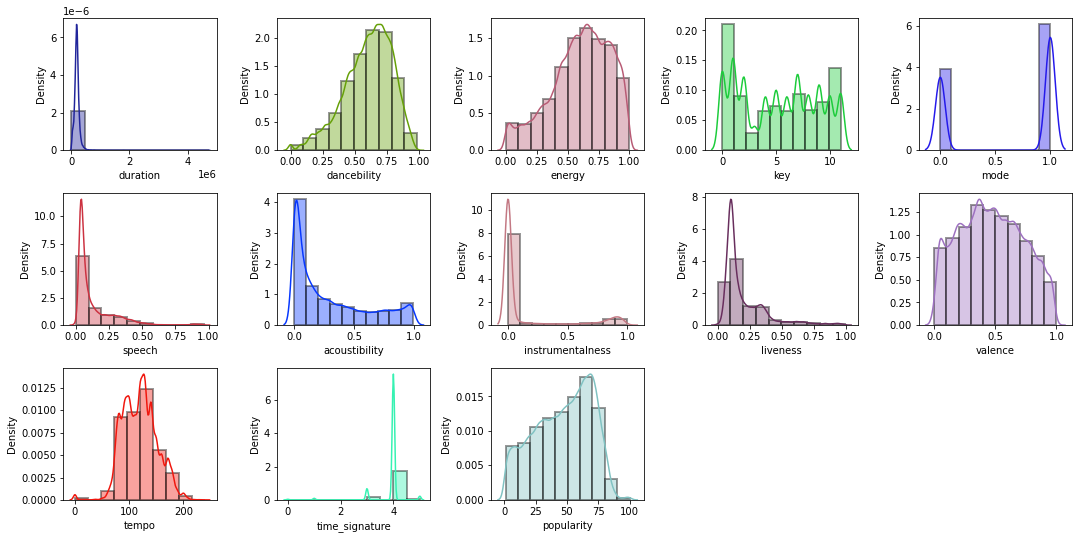

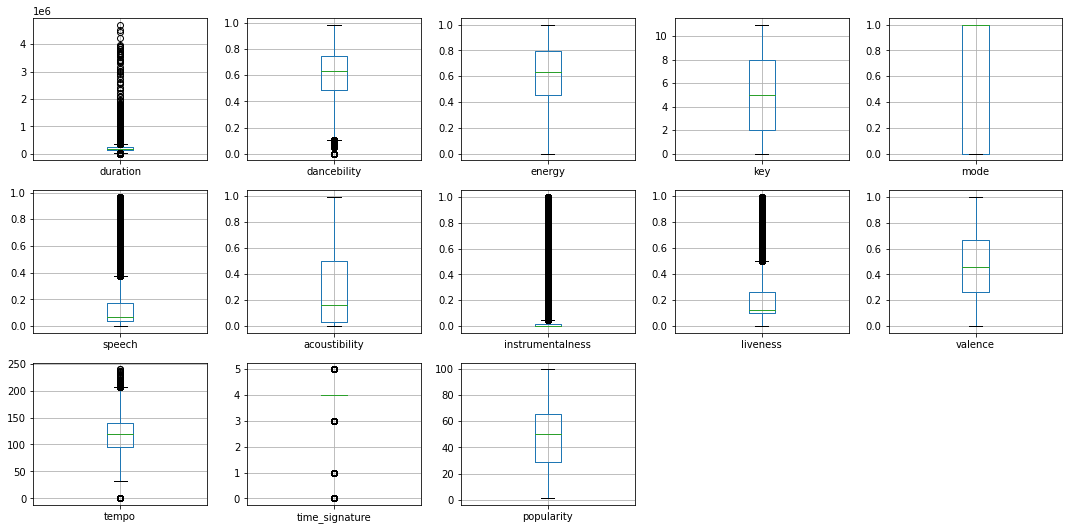

In [29]:
print('\033[1mNumeric Features Distribution'.center(100))

numeric_features = ['duration', 'dancebility', 'energy', 'key', 'mode', 'speech', 'acoustibility', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature', 'popularity']

n = 5
clr = ['r', 'g', 'b', 'g', 'b', 'r']

# Histograms Visualization for Numeric Features
plt.figure(figsize=[15, 4*math.ceil(len(numeric_features)/n)])
for i, feature in enumerate(numeric_features):
    plt.subplot(math.ceil(len(numeric_features)/3), n, i+1)
    sns.distplot(df_cleaned[feature], hist_kws=dict(edgecolor="black", linewidth=2), bins=10, color=list(np.random.randint([255, 255, 255])/255))
plt.tight_layout()
plt.show()

# Boxplots Visualization for Numeric Features
plt.figure(figsize=[15, 4*math.ceil(len(numeric_features)/n)])
for i, feature in enumerate(numeric_features):
    plt.subplot(math.ceil(len(numeric_features)/3), n, i+1)
    df_cleaned.boxplot(feature)
plt.tight_layout()
plt.show()


##### Observations:

Histograms have been plotted for all numeric columns of our dataset and based on the plots certain observations can be made, The columns 'duration',  'key', 'mode', 'speech', 'acoustibility', 'instrumentalness', 'liveness', 'valence', 'tempo', 'popularity' are right skewed. And the columns 'dancebility', 'energy','time_signature' are left skewed.

This type of data distribution indicates that the indeed has outliers and we need to analyze the data further for outliers.

## Bivariate Analysis - Numeric columns:

In [30]:
df_cleaned.corr()

id  total_tracks  duration  dancebility    energy  \
id                1.000000      0.004343 -0.004686    -0.001174 -0.000129   
total_tracks      0.004343      1.000000 -0.069033    -0.125868 -0.077847   
duration         -0.004686     -0.069033  1.000000    -0.072603  0.101104   
dancebility      -0.001174     -0.125868 -0.072603     1.000000  0.175044   
energy           -0.000129     -0.077847  0.101104     0.175044  1.000000   
key               0.003159      0.012781  0.000835     0.013631  0.049045   
mode             -0.001431      0.005958 -0.003201    -0.060950 -0.039246   
speech            0.003140      0.114940 -0.149696     0.203284  0.005204   
acoustibility     0.001574      0.084470 -0.063823    -0.268929 -0.643639   
instrumentalness -0.001793      0.054015 -0.011908    -0.313341 -0.323359   
liveness          0.002894      0.059919 -0.036871    -0.131741  0.167609   
valence          -0.000754     -0.031996 -0.033381     0.437450  0.345858   
tempo            -0.002080     -0.001656  0.043912     0.068220  0.210759   
time_signature    0.000617     -0.054477  0.064644     0.236848  0.153757   
popularity        0.000562      0.137746 -0.066801    -0.050402  0.062594   

                       key      mode    speech  acoustibility  \
id                0.003159 -0.001431  0.003140       0.001574   
total_tracks      0.012781  0.005958  0.114940       0.084470   
duration          0.000835 -0.003201 -0.149696      -0.063823   
dancebility       0.013631 -0.060950  0.203284      -0.268929   
energy            0.049045 -0.039246  0.005204      -0.643639   
key               1.000000 -0.181973  0.023624      -0.005816   
mode             -0.181973  1.000000 -0.052274       0.036621   
speech            0.023624 -0.052274  1.000000      -0.006926   
acoustibility    -0.005816  0.036621 -0.006926       1.000000   
instrumentalness -0.012486  0.016158 -0.191166       0.287486   
liveness          0.018972 -0.016802  0.158806      -0.053989   
valence           0.051629 -0.001082  0.060271      -0.176827   
tempo             0.015006 -0.010355  0.035725      -0.196548   
time_signature    0.014965 -0.037621  0.025141      -0.153443   
popularity       -0.006172  0.033528 -0.039074      -0.047269   

                  instrumentalness  liveness   valence     tempo  \
id                       -0.001793  0.002894 -0.000754 -0.002080   
total_tracks              0.054015  0.059919 -0.031996 -0.001656   
duration                 -0.011908 -0.036871 -0.033381  0.043912   
dancebility              -0.313341 -0.131741  0.437450  0.068220   
energy                   -0.323359  0.167609  0.345858  0.210759   
key                      -0.012486  0.018972  0.051629  0.015006   
mode                      0.016158 -0.016802 -0.001082 -0.010355   
speech                   -0.191166  0.158806  0.060271  0.035725   
acoustibility             0.287486 -0.053989 -0.176827 -0.196548   
instrumentalness          1.000000 -0.048111 -0.292591 -0.093223   
liveness                 -0.048111  1.000000 -0.007817 -0.012806   
valence                  -0.292591 -0.007817  1.000000  0.132532   
tempo                    -0.093223 -0.012806  0.132532  1.000000   
time_signature           -0.089794 -0.025660  0.110265  0.147306   
popularity               -0.190272  0.041074 -0.000076 -0.019584   

                  time_signature  popularity  
id                      0.000617    0.000562  
total_tracks           -0.054477    0.137746  
duration                0.064644   -0.066801  
dancebility             0.236848   -0.050402  
energy                  0.153757    0.062594  
key                     0.014965   -0.006172  
mode                   -0.037621    0.033528  
speech                  0.025141   -0.039074  
acoustibility          -0.153443   -0.047269  
instrumentalness       -0.089794   -0.190272  
liveness               -0.025660    0.041074  
valence                 0.110265   -0.000076  
tempo                   0.147306   -0.019584  
tim

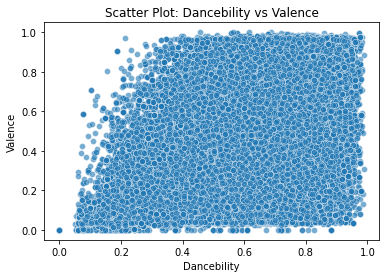

In [31]:
# Scatter plot between 'dancebility' and 'valence'
plt.figure(figsize=(6, 4))
sns.scatterplot(x='dancebility', y='valence', data=df_cleaned, alpha=0.6)
plt.title('Scatter Plot: Dancebility vs Valence')
plt.xlabel('Dancebility')
plt.ylabel('Valence')
plt.show()

#### Observation:- 
The correlation coefficient between danceability and valence is 0.44, indicating a moderate positive correlation. This suggests that songs with higher danceability tend to have higher valence or happiness.


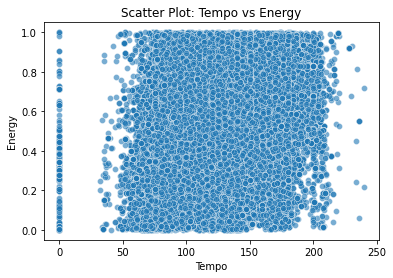

In [32]:
# Scatter plot between 'Tempo' and 'Energy'
plt.figure(figsize=(6, 4))
sns.scatterplot(x='tempo', y='energy', data=df_cleaned, alpha=0.6)
plt.title('Scatter Plot: Tempo vs Energy')
plt.xlabel('Tempo')
plt.ylabel('Energy')
plt.show()

#### Observation:- 
There is a positive correlation (0.21) between tempo and energy. Songs with a higher tempo are more likely to have higher energy levels.

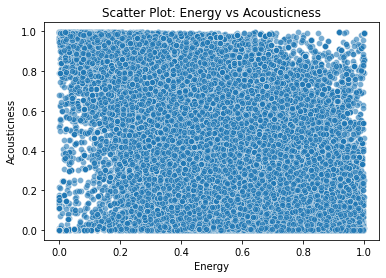

In [33]:
# Scatter plot between 'Acousticness' and 'Energy'
plt.figure(figsize=(6, 4))
sns.scatterplot(x='energy', y='acoustibility', data=df_cleaned, alpha=0.6)
plt.title('Scatter Plot: Energy vs Acousticness')
plt.xlabel('Energy')
plt.ylabel('Acousticness')
plt.show()

#### Observation:-  
There is a strong negative correlation (-0.64) between energy and acousticness. This implies that songs with high energy levels are less likely to be acoustic.

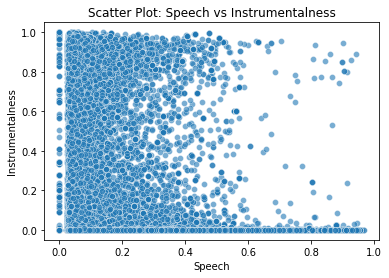

In [34]:
# Scatter plot between 'Instrumentalness' and 'speech'
plt.figure(figsize=(6, 4))
sns.scatterplot(x='speech', y='instrumentalness', data=df_cleaned, alpha=0.6)
plt.title('Scatter Plot: Speech vs Instrumentalness')
plt.xlabel('Speech')
plt.ylabel('Instrumentalness')
plt.show()

#### Observation:- 
Similar to acousticness, there is a negative correlation (-0.19) between speech and instrumentalness. Songs with higher speech are less likely to be instrumental.

## Bivariate Analysis - Categorical  columns:

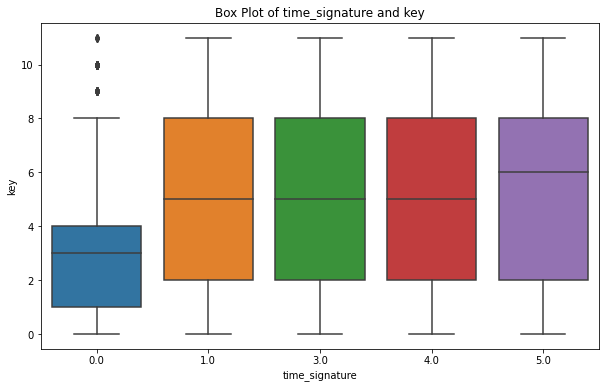

In [35]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='time_signature', y='key', data=df_cleaned)
plt.title('Box Plot of time_signature and key')
plt.xlabel('time_signature')
plt.ylabel('key')
plt.show()

#### Observation : - 
From the boxplot we can observe a fairly uniform distribution and few outliers

In [36]:
df_cleaned.head(10)

id                      song_name release_date  \
0   0             Ya Solo Eres Mi Ex   2021-09-09   
1   1                         Nibiru   2019-11-29   
2   2                          DAMN.   2017-04-14   
3   3  Did I Shave My Legs For This?   1996-01-01   
4   4                        glisten   2018-05-04   
5   5    IDK You Yet (Live on Piano)   2020-06-23   
6   6                     Pocahontas   1995-01-01   
7   7                     Next Level   2020-12-03   
8   8                    Green River   1969-08-03   
9   9                Wu-Tang Forever   1997-06-03   

                                    artists  total_tracks  duration  \
0  La Adictiva Banda San José de Mesillas,              7    222133   
1                                   Ozuna,             18    158826   
2                          Kendrick Lamar,             14    118066   
3                            Deana Carter,             11    203693   
4                           Jeremy Zucker,              4    169973   
5                            Alexander 23,              2    234538   
6                         Various Artists,             28     90160   
7                               ODP_Scino,              9    153600   
8            Creedence Clearwater Revival,             14    154120   
9                            Wu-Tang Clan,             27    406426   

   dancebility  energy   key  mode  speech  acoustibility  instrumentalness  \
0        0.455   0.324   7.0   1.0  0.0420        0.53700          0.000000   
1        0.814   0.566  10.0   0.0  0.3440        0.08100          0.000023   
2        0.357   0.238   8.0   0.0  0.2650        0.14200          0.085900   
3        0.640   0.707   8.0   1.0  0.0283        0.02600          0.000001   
4        0.773   0.437   9.0   1.0  0.0963        0.83600          0.000024   
5        0.371   0.183   0.0   1.0  0.0816        0.92300          0.000030   
6        0.577   0.368   7.0   1.0  0.0548        0.73800          0.000000   
7        0.705   0.410   1.0   1.0  0.4590        0.00818          0.000000   
8        0.702   0.772   9.0   1.0  0.0277        0.03120          0.008370   
9        0.674   0.645   0.0   1.0  0.2520        0.00631          0.000115   

   liveness  valence    tempo  time_signature  popularity  
0    0.1250    0.626   74.924             4.0        51.0  
1    0.1060    0.158  173.023             4.0        67.0  
2    0.5500    0.494  156.907             4.0        81.0  
3    0.1820    0.755  120.285             4.0        53.0  
4    0.5440    0.707  103.861             4.0        70.0  
5    0.3350    0.187   64.142             4.0        70.0  
6    0.4960    0.405  177.987             4.0        59.0  
7    0.1660    0.271   85.071             4.0         6.0  
8    0.0809    0.973  141.694             4.0        71.0  
9    0.2660    0.475  159.927             4.0        60.0

#### Plotting a summary of all relationships between the features.

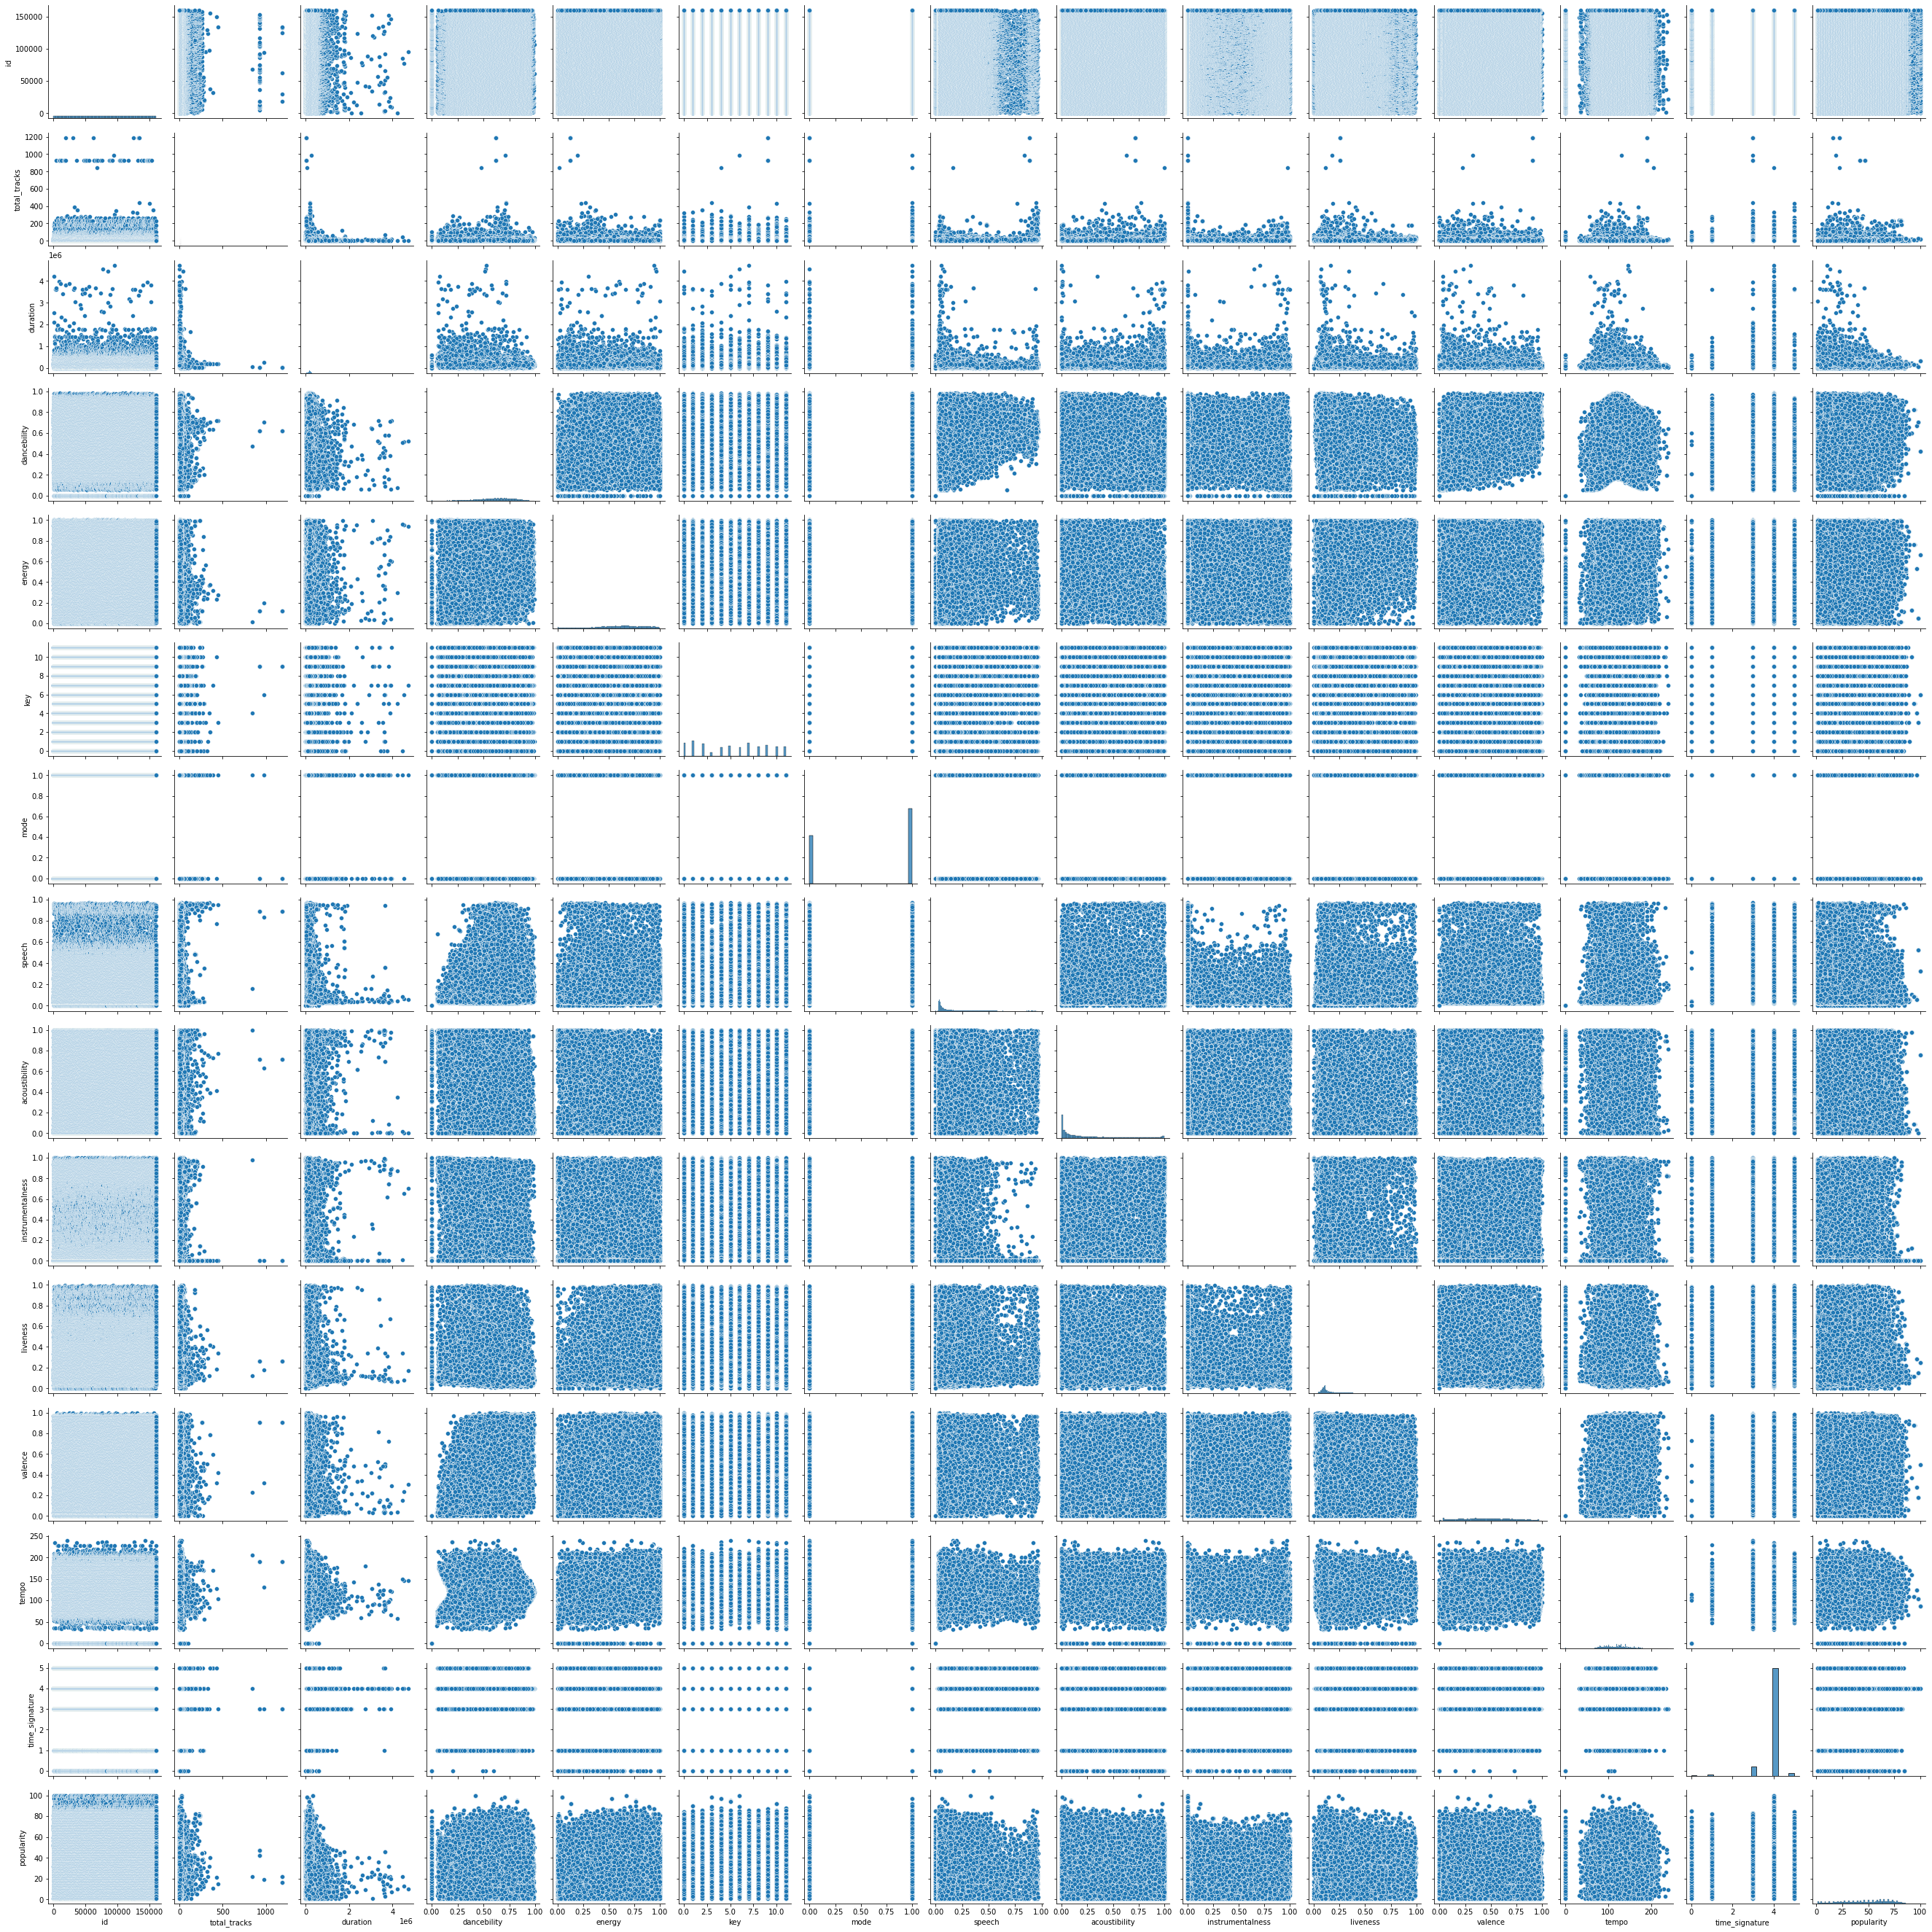

In [38]:
sns.pairplot(df_cleaned)

## Data Transformation

##### Transforming the "popularity" column

In [39]:
df_cleaned['popularity'].unique()

array([ 51.,  67.,  81.,  53.,  70.,  59.,   6.,  71.,  60.,  32.,  77.,
        68.,  56.,   1.,  52.,  73.,  82.,  63.,  55.,  54.,  65.,  49.,
        74.,  80.,  97.,   4.,  11.,  86.,  50.,  30.,  62.,  76.,  39.,
        79.,  17.,  40.,  44.,  19.,  47.,  69.,  45.,  64.,  66.,  24.,
        36.,  10.,  15.,  25.,  43.,   7.,  31.,  18.,  89.,  16.,  48.,
        29.,  13.,  21.,  37.,  57.,  41.,  46.,   3.,  20.,  75.,  38.,
         9.,  33.,   2.,   8.,  72.,  34.,  22.,  42.,  35.,  58.,  26.,
        61.,  14.,  12.,  28.,  23.,  27.,  78.,  84.,  83.,   5.,  88.,
        87., 100.,  98.,  85.,  94.,  92.,  90.,  95.])

In [40]:
df_cleaned['popularity'].value_counts()

69.0    3277
68.0    3066
71.0    3023
63.0    2946
66.0    2944
        ... 
94.0      96
97.0      90
92.0      80
90.0      54
95.0       5
Name: popularity, Length: 96, dtype: int64

In [41]:
# Assigning 0 to 'popularity' for rows where 'popularity' is less than 57
df_cleaned.loc[df_cleaned['popularity'] < 57, 'popularity'] = 0

# Assigning 1 to 'popularity' for rows where 'popularity' is greater than or equal to 57
df_cleaned.loc[df_cleaned['popularity'] >= 57, 'popularity'] = 1

df_cleaned.head(30)

id                                          song_name release_date  \
0    0                                 Ya Solo Eres Mi Ex   2021-09-09   
1    1                                             Nibiru   2019-11-29   
2    2                                              DAMN.   2017-04-14   
3    3                      Did I Shave My Legs For This?   1996-01-01   
4    4                                            glisten   2018-05-04   
5    5                        IDK You Yet (Live on Piano)   2020-06-23   
6    6                                         Pocahontas   1995-01-01   
7    7                                         Next Level   2020-12-03   
8    8                                        Green River   1969-08-03   
9    9                                    Wu-Tang Forever   1997-06-03   
10  10                        Salsoul Nugget (If U Wanna)   2020-11-20   
11  11  Enjoy Enjaami - Spotify Singles (with Dhee fea...   2021-06-21   
12  12                               Dark Lane Demo Tapes   2020-05-01   
13  13                                           epiphany   2021-06-02   
14  14                                      High Off Life   2020-05-15   
15  15                     Club Future Nostalgia (DJ Mix)   2020-08-28   
16  16                                                QVC   2021-04-23   
17  17                                             Quoted   2021-03-23   
18  18                                           I AM YOU   2018-08-03   
19  19                        Dangerous: The Double Album   2021-01-08   
20  20                                         ? (Deluxe)   2019-09-06   
21  21                 Come Over When You're Sober, Pt. 2   2018-11-09   
22  22                                      Box Fan Sound   2013-10-08   
23  23                                          Metallica   1991-08-12   
24  24                                              Lolly   2013-01-01   
25  25                                          Beethoven   2021-08-29   
26  26                                     Saint Cloud +3   2021-03-29   
27  27               Tequila On A Boat (feat. Chris Lane)   2021-05-14   
28  28                                               ZAZA   2021-02-19   
29  29                                        Golden Hour   2020-05-29   

                                     artists  total_tracks  duration  \
0   La Adictiva Banda San José de Mesillas,              7    222133   
1                                    Ozuna,             18    158826   
2                           Kendrick Lamar,             14    118066   
3                             Deana Carter,             11    203693   
4                            Jeremy Zucker,              4    169973   
5                             Alexander 23,              2    234538   
6                          Various Artists,             28     90160   
7                                ODP_Scino,              9    153600   
8             Creedence Clearwater Revival,             14    154120   
9                             Wu-Tang Clan,             27    406426   
10                 M&S, The Girl Next Door,              5    209813   
11                          DJ Snake, Dhee,              1    167058   
12                                   Drake,             14    222928   
13                                KA$HDAMI,             14    118256   
14                                  Future,             21    201979   
15           Dua Lipa, The Blessed Madonna,             17    174240   
16                                  Skofee,              1    165867   
17                   Gerald Kenneth Turner,              2    208000   
18                               YNW Melly,             15    193733   
19                           Morgan Wallen,             30    202133   
20                            XXXTENTACION,             53    117482   
21                                Lil Peep,             13    280520   
22       Tmsoft’s White Noise Sleep Sounds,          

In [42]:
df_cleaned['popularity'].value_counts()

0.0    94689
1.0    65097
Name: popularity, dtype: int64

#### Observation :- 
1. It has two unique values.
2. Songs which has popularity greater than > 57 are encoded as '1.0' and has less records when compare to the songs which has popularity less than < 57 and encoded as '0.0' in the dataset.